In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# A

In [1]:
import collections
import io
import math
import os
import random
from six.moves import urllib

from IPython.display import clear_output, Image, display, HTML

import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import scipy.io
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2022-11-17 13:00:28--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz [following]
--2022-11-17 13:00:29--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  31.7MB/s    in 11s     

2022-11-17 13:00:40 (29.4 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2022-11-17 13:00:44--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.

In [2]:
import tarfile
import urllib
# this snippet of code is modified for our use case with additional comments, original source code:
# https://github.com/tflearn/tflearn/blob/master/tflearn/datasets/cifar10.py
def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath

In [3]:
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

In [4]:
# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

In [5]:
download("17flowers.tgz", "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/","17category-flowers-py")

('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted in to  17category-flowers-py


'17category-flowers-py/17flowers.tgz'

In [ ]:
os.listdir("/content/17category-flowers-py/")

['17flowers.tgz', 'jpg']

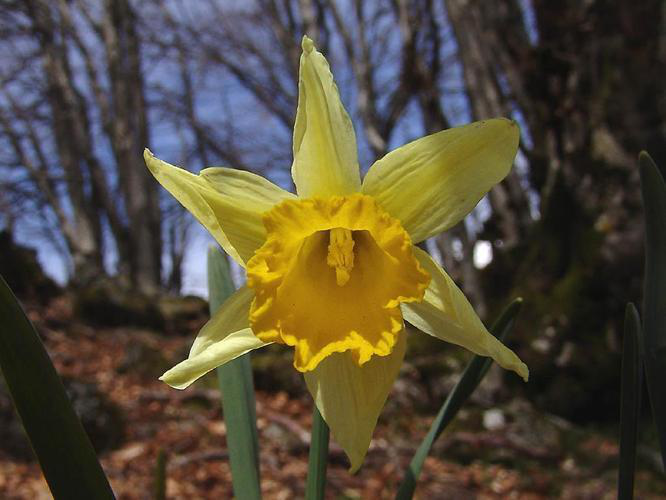

In [6]:
from PIL import Image #show one example of image
Image.open("/content/17category-flowers-py/jpg/image_0002.jpg")

In [7]:
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [8]:
#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=1
for i in range(1, total): 
    fname="/content/17category-flowers-py/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [ ]:
from sklearn.model_selection import train_test_split 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state =  104)

In [9]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
images.shape

(1360, 224, 224, 3)

In [ ]:
images=images/255.0

In [10]:
labels=labels.ravel()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


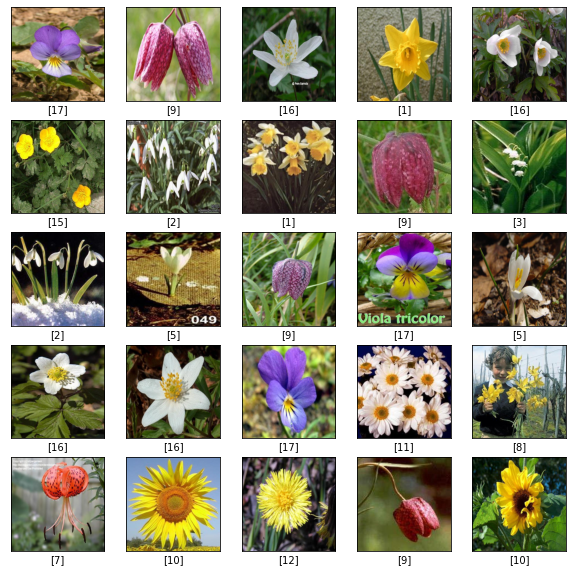

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255, cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

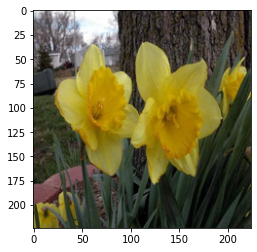

In [ ]:
plt.imshow(images[0]/255)
plt.show()

In [ ]:
train_labels[0]

array([17])

In [ ]:
images[0]

array([[[242., 241., 246.],
        [235., 234., 239.],
        [235., 234., 239.],
        ...,
        [ 39.,  30.,  31.],
        [ 60.,  51.,  52.],
        [ 52.,  43.,  44.]],

       [[234., 233., 238.],
        [226., 225., 230.],
        [224., 223., 228.],
        ...,
        [ 33.,  26.,  26.],
        [ 65.,  58.,  59.],
        [ 66.,  59.,  59.]],

       [[224., 224., 229.],
        [214., 214., 219.],
        [209., 209., 214.],
        ...,
        [ 26.,  21.,  20.],
        [ 56.,  50.,  50.],
        [ 65.,  60.,  60.]],

       ...,

       [[138., 132.,  59.],
        [137., 133.,  40.],
        [134., 132.,  48.],
        ...,
        [ 41.,  51.,  35.],
        [ 41.,  45.,  34.],
        [ 50.,  49.,  42.]],

       [[132., 125.,  56.],
        [134., 126.,  41.],
        [139., 133.,  48.],
        ...,
        [ 39.,  51.,  33.],
        [ 40.,  44.,  30.],
        [ 48.,  47.,  37.]],

       [[132., 123.,  55.],
        [132., 123.,  40.],
        [136., 1

In [ ]:
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [ ]:
len(img_labels)

8189

In [ ]:
values, counts = np.unique(img_labels, return_counts=True)

In [ ]:
values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101], dtype=uint8)

In [ ]:
counts

array([ 40,  60,  40,  56,  65,  45,  40,  85,  46,  45,  87,  87,  49,
        48,  49,  41,  85,  82,  49,  56,  40,  59,  91,  42,  41,  41,
        40,  66,  78,  85,  52,  45,  46,  40,  43,  75, 108,  56,  41,
        67, 127,  59, 130,  93,  40, 196,  67,  71,  49,  92, 258,  85,
        93,  61,  71, 109,  67, 114,  67, 109,  50,  55,  54,  52, 102,
        61,  42,  54,  54,  62,  78,  96, 194, 171, 120, 107, 251, 137,
        41, 105, 166, 112, 131,  86,  63,  58,  63, 154, 184,  82,  76,
        66,  46, 162, 128,  91,  66,  82,  63,  49,  58,  48])

In [ ]:
result = np.nonzero(values == 25)

In [ ]:
result[0][0]

25

In [ ]:
counts[25]

41

In [ ]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train = y_train.ravel()

In [ ]:
y_val = y_val.ravel()

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
import cv2
trainx = []
trainy = []
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  trainy.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (24,24))
  # normalized_img = cv2.normalize(resized, None, alpha=0, beta=1, 
  #                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  trainx.append(resized)

In [12]:
from skimage import feature
import cv2
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
X_train, valx, y_train, valy = train_test_split(trainx, trainy,stratify=trainy, test_size=0.4, random_state=10)
X_text,X_val,y_text,y_val = train_test_split(valx, valy,stratify=valy, test_size=0.4, random_state=10)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainx, trainy,stratify=trainy, test_size=0.4, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train,stratify=y_train, test_size=0.6, random_state=10)

In [ ]:
len(X_train)

14000

In [ ]:
len(y_train)

14000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,stratify=y_train, test_size=0.3, random_state=10)

# Start

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(images, labels,stratify=labels, train_size = 0.8, random_state =  8)

In [54]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  636)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.93, random_state =  233)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)

In [ ]:
import random
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =random.randrange(0,200,300))
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = random.randrange(92, 95, 4)/100, random_state =  random.randrange(0,200,300))
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)

In [55]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)

In [56]:
color_hist_val_des=[]
for image in X_val:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_val_des.append(total_hist)

In [57]:
X_train_des=[]
X_val_des=[]
for image in X_train:
  hog_desc = feature.hog(image/255, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des.append(hog_desc)
for image in X_val:
  hog_desc = feature.hog(image/255, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
len(X_val_des)

327

In [58]:
X_train_desc=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des[index]), axis=None)
  X_train_desc.append(nn)
X_val_desc=[]
for index in range(len(color_hist_val_des)):
  nn=np.concatenate((color_hist_val_des[index], X_val_des[index]), axis=None)
  X_val_desc.append(nn)

In [ ]:
len(X_train_desc)

1088

In [ ]:
len(X_val_desc)

0

In [ ]:
X_train[0]

array([[[0.34509805, 0.42352942, 0.67058825],
        [0.34509805, 0.42352942, 0.67058825],
        [0.34509805, 0.42352942, 0.67058825],
        ...,
        [0.05098039, 0.14509805, 0.13725491],
        [0.02352941, 0.1254902 , 0.10980392],
        [0.16470589, 0.28235295, 0.25882354]],

       [[0.34509805, 0.42352942, 0.67058825],
        [0.34509805, 0.42352942, 0.67058825],
        [0.34509805, 0.42352942, 0.67058825],
        ...,
        [0.10980392, 0.15294118, 0.15294118],
        [0.07450981, 0.1254902 , 0.11764706],
        [0.06666667, 0.1254902 , 0.11372549]],

       [[0.34509805, 0.42352942, 0.67058825],
        [0.34509805, 0.42352942, 0.67058825],
        [0.34509805, 0.42352942, 0.67058825],
        ...,
        [0.15686275, 0.16078432, 0.14509805],
        [0.20784314, 0.21568628, 0.20784314],
        [0.11372549, 0.13333334, 0.13725491]],

       ...,

       [[0.14117648, 0.1764706 , 0.09019608],
        [0.14509805, 0.21176471, 0.14901961],
        [0.07450981, 0

In [ ]:
y_val

array([11, 11,  8, 17, 10,  2,  8, 11,  1,  1,  2,  6,  3,  2,  9, 10, 16,
       12, 17,  8,  3, 16,  7, 10,  6,  6,  4,  7, 13, 12, 14, 16,  1,  6,
        1, 17,  3, 10, 14, 14,  2, 15, 13,  8,  2,  5,  8, 13, 11,  5,  2,
        7,  1, 11, 17, 16, 10, 13,  4,  8,  7,  8, 13,  3,  4,  4, 12, 11,
        8,  3,  7, 13,  3,  7,  6,  5,  8,  5,  5,  2, 14, 13, 15,  1, 14,
       15,  8,  7,  1, 17, 13, 11,  8, 14, 15, 14, 11, 14, 10,  3,  1, 12,
        9, 10, 17, 15,  4, 14, 12,  4, 14, 15, 15, 17,  3,  6, 17, 14,  1,
       15, 12, 10, 15, 16, 10,  1, 14, 11, 13,  8,  9, 17,  4,  2,  1,  8,
        8,  2,  9, 12,  6,  6,  1, 10,  1,  5, 10, 12,  7, 16,  1,  9,  9,
       17, 17,  3, 14,  5, 10, 13, 10, 17,  2,  4,  3, 13, 15, 10,  4, 10,
        4,  3,  7, 11,  6,  9,  4,  9,  9,  5, 14,  3,  7,  5,  4,  6, 12,
        5,  5,  4,  9, 12, 13, 14,  3,  2,  3, 16,  7,  1,  7,  9,  7, 15,
       12, 16, 11, 12,  7,  8, 12,  6,  5, 14, 12,  8, 16,  7,  9,  9, 16,
       16, 17, 13, 11,  2

In [ ]:
X_val[0]

array([[[0.5411765 , 0.45490196, 0.36078432],
        [0.5803922 , 0.49411765, 0.40392157],
        [0.52156866, 0.43529412, 0.34901962],
        ...,
        [0.08235294, 0.05098039, 0.05490196],
        [0.08627451, 0.04313726, 0.03529412],
        [0.38431373, 0.3254902 , 0.29803923]],

       [[0.5372549 , 0.4509804 , 0.3764706 ],
        [0.6431373 , 0.56078434, 0.48235294],
        [0.5294118 , 0.44705883, 0.3764706 ],
        ...,
        [0.08235294, 0.03921569, 0.02745098],
        [0.3019608 , 0.2509804 , 0.21568628],
        [0.49411765, 0.42745098, 0.3764706 ]],

       [[0.49803922, 0.4117647 , 0.3529412 ],
        [0.5137255 , 0.43137255, 0.37254903],
        [0.44313726, 0.36862746, 0.30980393],
        ...,
        [0.25882354, 0.19607843, 0.15686275],
        [0.3372549 , 0.26666668, 0.19607843],
        [0.3137255 , 0.23921569, 0.15686275]],

       ...,

       [[0.40392157, 0.34509805, 0.25882354],
        [0.38039216, 0.3137255 , 0.21960784],
        [0.49019608, 0

In [ ]:
X_des=[]
for image in images:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_des.append(hog_desc)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1,0.5,1,2,3,10,100], 
              'gamma': [10,3,2,1,0.2, 0.1,0.01],
              'kernel': ['linear', 'poly','rbf','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_des, labels)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.419 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.438 total time=   0.4s
[CV 3/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.342 total time=   0.4s
[CV 4/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.290 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.228 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.515 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.515 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.493 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.415 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=10, kernel=poly;, score=0.287 total time=   0.4s
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.210 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 10, 100],
                         'gamma': [10, 3, 2, 1, 0.2, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.01,0.1,0.5,0.6,1,1.5,2,3,10,100], 
              'gamma': [4,3,2.5,2,1,0.2,0.1,0.01,0.001],
              'kernel': ['linear', 'poly','rbf','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_des, labels)

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.01,0.1,0.5,0.6,1,1.5,2,3,10,100], 
              'gamma': [5,4,3,2.5,2,1.5,1,0.2,0.1,0.01,0.001],
              'kernel': ['linear','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_des, labels)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[CV 1/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.419 total time=   0.7s
[CV 2/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.438 total time=   0.8s
[CV 3/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.342 total time=   0.8s
[CV 4/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.290 total time=   0.8s
[CV 5/5] END ....C=0.01, gamma=5, kernel=linear;, score=0.228 total time=   0.5s
[CV 1/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.140 total time=   0.7s
[CV 2/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.147 total time=   0.6s
[CV 3/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.114 total time=   0.5s
[CV 4/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.140 total time=   0.5s
[CV 5/5] END ...C=0.01, gamma=5, kernel=sigmoid;, score=0.081 total time=   0.5s
[CV 1/5] END ....C=0.01, gamma=4, kernel=linear;, score=0.419 total time=   0.3s
[CV 2/5] END ....C=0.01, gamma=4, kernel=line

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.6, 1, 1.5, 2, 3, 10, 100],
                         'gamma': [5, 4, 3, 2.5, 2, 1.5, 1, 0.2, 0.1, 0.01,
                                   0.001],
                         'kernel': ['linear', 'sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'poly'}
SVC(C=1, gamma=1, kernel='poly')


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 2, 'gamma': 2, 'kernel': 'rbf'}
SVC(C=2, gamma=2)


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1.5, 'gamma': 2, 'kernel': 'rbf'}
SVC(C=1.5, gamma=2)


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 3, 'gamma': 5, 'kernel': 'linear'}
SVC(C=3, gamma=5, kernel='linear')


In [ ]:
labels

array([ 1,  1,  1, ..., 17, 17, 17])

In [ ]:
X_vv=np.array(X_train_des)
X_vv.shape

(1088, 512)

In [ ]:
len(y_train)

1088

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_des, y_train)

GaussianNB()

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_des, y_train)

SVC(C=1.5, gamma=2)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=1.5,gamma=2)
clf.fit(X_train_des, y_train)

SVC(C=1.5, gamma=2, kernel='poly')

In [ ]:
clf.score(X_train_des,y_train)

0.9502262443438914

In [ ]:
clf.score(X_val_des, y_val)

0.46638655462184875

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=3,gamma=5)
clf.fit(X_train_des, y_train)

SVC(C=3, gamma=5, kernel='linear')

In [ ]:
clf.score(X_train_des,y_train)

0.8065610859728507

In [ ]:
clf.score(X_val_des, y_val)

0.43907563025210083

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_des, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
clf.score(X_train_des,y_train)

0.8065610859728507

In [ ]:
clf.score(X_val_des, y_val)

0.43907563025210083

In [ ]:
X_train_des=[]
X_val_des=[]
for image in x_train:
  hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(6, 6), cells_per_block=(4, 4), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des.append(hog_desc)
for image in x_test:
  hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(6, 6), cells_per_block=(4, 4), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)

In [ ]:
len(X_train_des[0])

6084

In [ ]:
y_train=y_train.ravel()

In [ ]:
y_train[0]

5

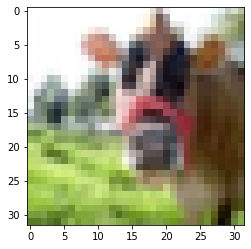

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
y_train[0]

array([5], dtype=uint8)

In [ ]:
nn=np.array(X_train_des)

In [ ]:
nn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
nn.shape

(60000, 6084)

In [ ]:
from sklearn import datasets, svm, metrics
classifier = svm.SVC(gamma=0.01, kernel='rbf')
#fit to the trainin data
classifier.fit(X_train_des,y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_des, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
neigh.score(X_train_des, y_train)

0.5457857142857143

In [ ]:
neigh.score(X_val_des, y_val)

0.4495

In [ ]:
y_train

In [ ]:
classifier.score(X_train_des, y_train)

0.6688571428571428

In [ ]:
classifier.score(X_val_des, y_val)

0.5443333333333333

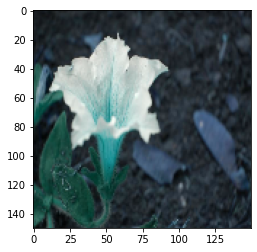

50


In [ ]:
plt.imshow(trainx[1],cmap='gray')
plt.show()
print(trainy[1])

In [ ]:
trainx[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        ...,
        [0.43137258, 0.45882356, 0.47058827],
        [0.43921572, 0.45098042, 0.47058827],
        [0.43921572, 0.45098042, 0.47058827]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.42352945, 0.44705886, 0.4666667 ],
        [0.43529415, 0.44705886, 0.46274513],
        [0.427451  , 0.43921572, 0.454902  ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.40784317, 0.43137258, 0.45882356],
        [0.43137258, 0.44705886, 0.45098042],
        [0.42352945, 0.43921572, 0.4431373 ]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [ ]:
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

Training Dataset Shape: ­(5732, 150, 150, 3)
No. of Training Dataset Labels: 5732


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [ ]:
import imageio
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [ ]:
datadir_train='/content/gdrive/My Drive/dataset/80x80_89class/Train'
datadir_test='/content/gdrive/My Drive/dataset/80x80_89class/Test'
datadir_validation='/content/gdrive/My Drive/dataset/80x80_89class/Validation'
train_set=[]
test_set=[]
val_set=[]

In [ ]:
categories=[]
for label in os.listdir(datadir_train):
  categories.append(label)

In [ ]:
from PIL import Image

def white_bg_square(img):
    "return a white-background-color image having the img in exact center"
    size = (max(img.size),)*2
    layer = Image.new('L', size, 255)
    layer.paste(img, tuple(map(lambda x:int((x[0]-x[1])/2), zip(size, img.size))))
    return layer

In [ ]:
def reverse_white(img):
  width , height = img.shape
  new_img= img.copy()
  for x in range(0,width):
          for y in range(0,height):
              if new_img[x,y] >= 230:            
                  new_img[x,y] = 230
  return new_img

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [ ]:
import imageio
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [ ]:
datadir_train='/content/gdrive/My Drive/dataset/80x80_89class/Train'
datadir_test='/content/gdrive/My Drive/dataset/80x80_89class/Test'
datadir_validation='/content/gdrive/My Drive/dataset/80x80_89class/Validation'
train_set=[]
test_set=[]
val_set=[]

In [ ]:
categories=[]
for label in os.listdir(datadir_train):
  categories.append(label)

In [ ]:
from PIL import Image

def white_bg_square(img):
    "return a white-background-color image having the img in exact center"
    size = (max(img.size),)*2
    layer = Image.new('L', size, 255)
    layer.paste(img, tuple(map(lambda x:int((x[0]-x[1])/2), zip(size, img.size))))
    return layer

In [ ]:
def reverse_white(img):
  width , height = img.shape
  new_img= img.copy()
  for x in range(0,width):
          for y in range(0,height):
              if new_img[x,y] >= 230:            
                  new_img[x,y] = 230
  return new_img

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [21]:
import imageio
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [ ]:
datadir_train='/content/gdrive/My Drive/dataset/80x80_89class/Train'
datadir_test='/content/gdrive/My Drive/dataset/80x80_89class/Test'
datadir_validation='/content/gdrive/My Drive/dataset/80x80_89class/Validation'
train_set=[]
test_set=[]
val_set=[]

In [ ]:
categories=[]
for label in os.listdir(datadir_train):
  categories.append(label)

In [ ]:
from PIL import Image

def white_bg_square(img):
    "return a white-background-color image having the img in exact center"
    size = (max(img.size),)*2
    layer = Image.new('L', size, 255)
    layer.paste(img, tuple(map(lambda x:int((x[0]-x[1])/2), zip(size, img.size))))
    return layer

In [ ]:
def reverse_white(img):
  width , height = img.shape
  new_img= img.copy()
  for x in range(0,width):
          for y in range(0,height):
              if new_img[x,y] >= 230:            
                  new_img[x,y] = 230
  return new_img

# Tạo các Set

## Train Set

In [ ]:
for category in categories:
  path=os.path.join(datadir_train,category)
  class_num=categories.index(category)
  for img in os.listdir(path):
    IMG_SIZE=28
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      # img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      # reversed_white_img = reverse_white(img_array)
      img_pil = Image.fromarray(img_array)
      new_array= white_bg_square(img_pil)
      img_resize_lanczos = new_array.resize((28, 28), Image.LANCZOS)
      im_np = np.asarray(img_resize_lanczos)
      # resized_img=cv2.resize(im_np,(IMG_SIZE,IMG_SIZE))
      reversed_img=cv2.bitwise_not(im_np)
      train_set.append([reversed_img,class_num])
    except:
      pass

In [ ]:
print(len(train_set))

30067


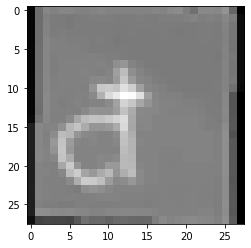

đ


In [ ]:
plt.imshow(train_set[15040][0],cmap='gray')
plt.show()
print(categories[train_set[15040][1]])

## Test Set

In [ ]:
for category in categories:
  path=os.path.join(datadir_test,category)
  class_num=categories.index(category)
  for img in os.listdir(path):
    IMG_SIZE=28
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      # img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      # reversed_white_img = reverse_white(img_array)
      img_pil = Image.fromarray(img_array)
      new_array= white_bg_square(img_pil)
      img_resize_lanczos = new_array.resize((28, 28), Image.LANCZOS)
      im_np = np.asarray(img_resize_lanczos)
      # resized_img=cv2.resize(im_np,(IMG_SIZE,IMG_SIZE))
      reversed_img=cv2.bitwise_not(im_np)
      test_set.append([reversed_img,class_num])
    except:
      pass

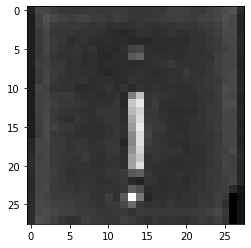

ị


In [ ]:
plt.imshow(test_set[8000][0],cmap='gray')
plt.show()
print(categories[test_set[8000][1]])

In [ ]:
print(len(test_set))

10026


## val set

In [ ]:
for category in categories:
  path=os.path.join(datadir_validation,category)
  class_num=categories.index(category)
  for img in os.listdir(path):
    IMG_SIZE=28
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      # img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      # reversed_white_img = reverse_white(img_array)
      img_pil = Image.fromarray(img_array)
      new_array= white_bg_square(img_pil)
      img_resize_lanczos = new_array.resize((28, 28), Image.LANCZOS)
      im_np = np.asarray(img_resize_lanczos)
      # resized_img=cv2.resize(im_np,(IMG_SIZE,IMG_SIZE))
      reversed_img=cv2.bitwise_not(im_np)
      val_set.append([reversed_img,class_num])
    except:
      pass

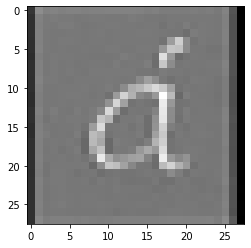

á


In [ ]:
plt.imshow(val_set[3040][0],cmap='gray')
plt.show()
print(categories[val_set[3040][1]])

# Shuffle và tách label,feature

In [ ]:
X_train=[]
y_train=[]

In [ ]:
X_test=[]
y_test=[]

In [ ]:
X_val=[]
y_val=[]

In [ ]:
length = int(len(test_set)//2)
minus_length = length * -1
head = test_set[:length]
tail = test_set[minus_length:]

In [ ]:
train_set = train_set + head
val_set = val_set + tail

In [ ]:
print(len(train_set))

35080


In [ ]:
print(len(val_set))

15033


In [ ]:
import random
random.shuffle(train_set)
# random.shuffle(test_set)
random.shuffle(val_set)

In [ ]:
# for feature,label in test_set:
#   X_test.append(feature)
#   y_test.append(label)

In [ ]:
for feature,label in val_set:
  X_val.append(feature)
  y_val.append(label)

In [ ]:
for feature,label in train_set:
  X_train.append(feature)
  y_train.append(label)

# Data augmentation

In [11]:
rotation_5 = [] # góc 5 độ
rotation_5_minus = [] #góc âm 5 độ
rotation_10 = [] # góc 10 độ
rotation_10_minus = [] #góc âm 10 độ
rotation_15 = [] # góc 15 độ
rotation_15_minus = [] #góc âm 15 độ
rotation_20 = [] # góc 20 độ
rotation_20_minus = [] #góc âm 20 độ
rotation_30 = [] # góc 20 độ
rotation_30_minus = [] #góc âm 20 độ
random_rotation = [] # random từ -30 đến 30

##-30 độ

In [ ]:
rotate=iaa.Affine(rotate=-30,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_30_minus.append([rotated_image,y_train[index]])
  rotation_30_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [59]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [ ]:
len(color_hist_train_des)

1088

In [60]:
X_train_30=[]
y_train_30=[]
rotate=iaa.Affine(rotate=-30,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_30.append(X_train[index]/255)
  y_train_30.append(y_train[index])
  X_train_30.append(rotated_image/255)
  y_train_30.append(y_train[index])

In [ ]:
len(X_train_30)

2176

In [ ]:
len(y_train_30)

2176

In [61]:
X_train_des_30=[]
for image in X_train_30:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_30.append(hog_desc)

In [62]:
X_train_desc_30=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_30[index]), axis=None)
  X_train_desc_30.append(nn)

In [ ]:
len(X_train_desc_30)

2176

In [63]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_30, y_train_30)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_30,y_train_30)

0.9770220588235294

In [64]:
clf.score(X_val_desc,y_val)

0.5988538681948424

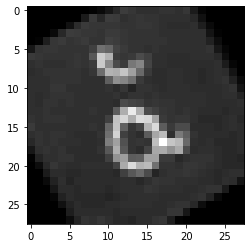

ă


In [ ]:
plt.imshow(rotation_30_minus[3040][0],cmap='gray')
plt.show()
print(categories[rotation_30_minus[3040][1]])

In [ ]:
print(len(rotation_30_minus))

70160


## -20

In [ ]:
rotate=iaa.Affine(rotate=-20,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_20_minus.append([rotated_image,y_train[index]])
  rotation_20_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [65]:
X_train_20_minus=[]
y_train_20_minus=[]
rotate=iaa.Affine(rotate=-20,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_20_minus.append(X_train[index])
  y_train_20_minus.append(y_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  X_train_20_minus.append(rotated_image)
  y_train_20_minus.append(y_train[index])
  rotation_15_minus.append([X_train[index][0],y_train[index]])

In [66]:
X_train_des_20_mi=[]
for image in X_train_20_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_20_mi.append(hog_desc)

In [67]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [68]:
X_train_desc_20=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_20_mi[index]), axis=None)
  X_train_desc_20.append(nn)

In [69]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_20, y_train_20_minus)

SVC(C=1.5, gamma=2)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_20, y_train_20_minus)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=3,gamma=2)
clf.fit(X_train_desc_20, y_train_20_minus)

SVC(C=3, gamma=2)

In [ ]:
clf.score(X_train_desc_20,y_train_20_minus)

1.0

In [70]:
clf.score(X_val_desc,y_val)

0.5959885386819485

## -15 

In [ ]:
rotate=iaa.Affine(rotate=-15,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_15_minus.append([rotated_image,y_train[index]])
  rotation_15_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [71]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=-15,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index])
  y_train_10_minus.append(y_train[index])
  X_train_10_minus.append(rotated_image)
  y_train_10_minus.append(y_train[index])

In [72]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [73]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [74]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_20_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [75]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9793198529411765

In [76]:
clf.score(X_val_desc,y_val)

0.5959885386819485

## -10 

In [ ]:
rotate=iaa.Affine(rotate=-10,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_10_minus.append([rotated_image,y_train[index]])
  rotation_10_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [77]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=-10,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index])
  y_train_10_minus.append(y_train[index])
  X_train_10_minus.append(rotated_image)
  y_train_10_minus.append(y_train[index])

In [78]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [79]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [80]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [81]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1, gamma=2)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9724264705882353

In [82]:
clf.score(X_val_desc,y_val)

0.6045845272206304

## -5

In [ ]:
rotate=iaa.Affine(rotate=-5,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_5_minus.append([rotated_image,y_train[index]])
  rotation_5_minus.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [83]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=-5,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index])
  y_train_10_minus.append(y_train[index])
  rotation_5.append([rotated_image,y_train[index]])
  X_train_10_minus.append(rotated_image)
  y_train_10_minus.append(y_train[index])
  rotation_5.append([X_train[index][0],y_train[index]])

In [84]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [85]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [86]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [87]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9977022058823529

In [88]:
clf.score(X_val_desc,y_val)

0.6074498567335244

## 5

In [ ]:
rotate=iaa.Affine(rotate=5,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_5.append([rotated_image,y_train[index]])
  rotation_5.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [89]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [90]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=5,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index]/255)
  y_train_10_minus.append(y_train[index])
  X_train_10_minus.append(rotated_image/255)
  y_train_10_minus.append(y_train[index])

In [91]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [92]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [93]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1, gamma=2)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9829963235294118

In [94]:
clf.score(X_val_desc,y_val)

0.5988538681948424

## 10

In [ ]:
rotate=iaa.Affine(rotate=10,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_10.append([rotated_image,y_train[index]])
  rotation_10.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [95]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [96]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=10,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index]/255)
  y_train_10_minus.append(y_train[index])
  X_train_10_minus.append(rotated_image/255)
  y_train_10_minus.append(y_train[index])

In [97]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [98]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [99]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1, gamma=2)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9659926470588235

In [100]:
clf.score(X_val_desc,y_val)

0.5959885386819485

In [101]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9926470588235294

In [102]:
clf.score(X_val_desc,y_val)

0.6160458452722063

## 15

In [ ]:
rotate=iaa.Affine(rotate=15,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_15.append([rotated_image,y_train[index]])
  rotation_15.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [103]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=15,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index]/255)
  y_train_10_minus.append(y_train[index])
  X_train_10_minus.append(rotated_image/255)
  y_train_10_minus.append(y_train[index])

In [104]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [105]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [106]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [107]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9903492647058824

In [108]:
clf.score(X_val_desc,y_val)

0.6131805157593123

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=3,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)
clf.score(X_val_desc,y_val)

0.6269113149847095

In [109]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)
clf.score(X_val_desc,y_val)

0.5959885386819485

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=3)
clf.fit(X_train_desc_10_mi, y_train_10_minus)
clf.score(X_val_desc,y_val)

0.6238532110091743

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=1.5)
clf.fit(X_train_desc_10_mi, y_train_10_minus)
clf.score(X_val_desc,y_val)

0.6330275229357798

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=2,gamma=3)
clf.fit(X_train_desc_10_mi, y_train_10_minus)
clf.score(X_val_desc,y_val)

0.6238532110091743

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=3,gamma=3)
clf.fit(X_train_desc_10_mi, y_train_10_minus)
clf.score(X_val_desc,y_val)

0.6238532110091743

## 20

In [ ]:
rotate=iaa.Affine(rotate=20,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_20.append([rotated_image,y_train[index]])
  rotation_20.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [135]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=20,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index])
  y_train_10_minus.append(y_train[index])
  rotation_5.append([rotated_image,y_train[index]])
  X_train_10_minus.append(rotated_image)
  y_train_10_minus.append(y_train[index])
  rotation_5.append([X_train[index][0],y_train[index]])

In [136]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [137]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [138]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [139]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [140]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1,gamma=3)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1, gamma=3)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

In [141]:
clf.score(X_val_desc,y_val)

0.5873925501432665

## 30

In [ ]:
rotate=iaa.Affine(rotate=30,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotation_30.append([rotated_image,y_train[index]])
  rotation_30.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [142]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=30,cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index])
  y_train_10_minus.append(y_train[index])
  rotation_5.append([rotated_image,y_train[index]])
  X_train_10_minus.append(rotated_image)
  y_train_10_minus.append(y_train[index])
  rotation_5.append([X_train[index][0],y_train[index]])

In [143]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [144]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [145]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [120]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [146]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=3)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=3)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9705882352941176

In [147]:
clf.score(X_val_desc,y_val)

0.6074498567335244

## Random từ -30 đến 30

In [ ]:
rotate=iaa.Affine(rotate=(-30,30),cval=25)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  random_rotation.append([rotated_image,y_train[index]])
  rotation_30.append([X_train[index],y_train[index]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels,train_size = 0.8, random_state =  16)
from sklearn.model_selection import train_test_split 
X_trainz, X_val, y_trainz, y_val = train_test_split(X_train, y_train, train_size = 0.95, random_state =  109)
X_val=np.concatenate((X_val, X_test), axis=0)
y_val=np.concatenate((y_val, y_test), axis=0)
X_val_des=[]
for image in X_val:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_val_des.append(hog_desc)
rotation_15_minus=[]

In [148]:
X_train_10_minus=[]
y_train_10_minus=[]
rotate=iaa.Affine(rotate=(-30,30),cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  X_train_10_minus.append(X_train[index])
  y_train_10_minus.append(y_train[index])
  X_train_10_minus.append(rotated_image)
  y_train_10_minus.append(y_train[index])

In [149]:
color_hist_train_des=[]
color_hist_val_des=[]
for image in X_train:
  hist1 = cv2.calcHist([image],[0],None,[32],[0,256])
  new_hist1=hist1/np.sum(hist1)
  hist2 = cv2.calcHist([image],[1],None,[32],[0,256])
  new_hist2=hist2/np.sum(hist2)
  hist3 = cv2.calcHist([image],[2],None,[32],[0,256])
  new_hist3=hist3/np.sum(hist3)
  total_hist=np.concatenate((new_hist1,new_hist2,new_hist3), axis=None)
  color_hist_train_des.append(total_hist)
  color_hist_train_des.append(total_hist)

In [150]:
X_train_des_10_mi=[]
for image in X_train_10_minus:
  hog_desc = feature.hog(image, orientations=8, pixels_per_cell=(28, 28), cells_per_block=(8, 8), transform_sqrt=True, block_norm='L2-Hys')
  X_train_des_10_mi.append(hog_desc)

In [151]:
X_train_desc_10_mi=[]
for index in range(len(color_hist_train_des)):
  nn=np.concatenate((color_hist_train_des[index], X_train_des_10_mi[index]), axis=None)
  X_train_desc_10_mi.append(nn)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=2)
clf.fit(X_train_des_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=2)

In [152]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1.5,gamma=3)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1.5, gamma=3)

In [ ]:
clf.score(X_train_desc_10_mi,y_train_10_minus)

0.9885110294117647

In [153]:
clf.score(X_val_desc,y_val)

0.6103151862464183

In [128]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=1,gamma=2)
clf.fit(X_train_desc_10_mi, y_train_10_minus)

SVC(C=1, gamma=2)

In [ ]:
clf.score(X_train_des_10_mi,y_train_10_minus)

0.9563419117647058

In [129]:
clf.score(X_val_desc,y_val)

0.5845272206303725

# Tách label và feature đối với các tập data augmentation

In [ ]:
X_train_30 = []
y_train_30 = []
X_train_20 = []
y_train_20 = []
X_train_15 = []
y_train_15 = []
X_train_10 = []
y_train_10 = []
X_train_5 = []
y_train_5 = []

In [ ]:
X_train_30_minus = []
y_train_30_minus = []
X_train_20_minus = []
y_train_20_minus = []
X_train_15_minus = []
y_train_15_minus = []
X_train_10_minus = []
y_train_10_minus = []
X_train_5_minus = []
y_train_5_minus = []

In [ ]:
X_train_random = []
y_train_random = []
random.shuffle(random_rotation)

In [ ]:
random.shuffle(rotation_30)
random.shuffle(rotation_20)
random.shuffle(rotation_15)
random.shuffle(rotation_10)
random.shuffle(rotation_5)

In [ ]:
random.shuffle(rotation_30_minus)
random.shuffle(rotation_20_minus)
random.shuffle(rotation_15_minus)
random.shuffle(rotation_10_minus)
random.shuffle(rotation_5_minus)

In [ ]:
for feature,label in rotation_30:
  X_train_30.append(feature)
  y_train_30.append(label)
for feature,label in rotation_20:
  X_train_20.append(feature)
  y_train_20.append(label)
for feature,label in rotation_15:
  X_train_15.append(feature)
  y_train_15.append(label)
for feature,label in rotation_10:
  X_train_10.append(feature)
  y_train_10.append(label)
for feature,label in rotation_5:
  X_train_5.append(feature)
  y_train_5.append(label)

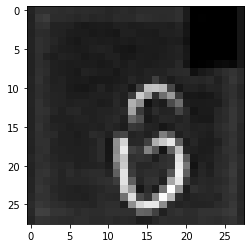

In [ ]:
plt.imshow(X_train_30[3040],cmap='gray')
plt.show()

In [ ]:
for feature,label in rotation_30_minus:
  X_train_30_minus.append(feature)
  y_train_30_minus.append(label)
for feature,label in rotation_20_minus:
  X_train_20_minus.append(feature)
  y_train_20_minus.append(label)
for feature,label in rotation_15_minus:
  X_train_15_minus.append(feature)
  y_train_15_minus.append(label)
for feature,label in rotation_10_minus:
  X_train_10_minus.append(feature)
  y_train_10_minus.append(label)
for feature,label in rotation_5_minus:
  X_train_5_minus.append(feature)
  y_train_5_minus.append(label)

In [ ]:
for feature,label in random_rotation:
  X_train_random.append(feature)
  y_train_random.append(label)

# Normalize và categories

In [ ]:
X_train_30 = np.array(X_train_30).reshape(-1,28,28,1)
X_train_20 = np.array(X_train_20).reshape(-1,28,28,1)
X_train_10 =np.array(X_train_10).reshape(-1,28,28,1)
X_train_15 =np.array(X_train_15).reshape(-1,28,28,1)
X_train_5=np.array(X_train_5).reshape(-1,28,28,1)

In [ ]:
X_train_30_minus = np.array(X_train_30_minus).reshape(-1,28,28,1)
X_train_20_minus = np.array(X_train_20_minus).reshape(-1,28,28,1)
X_train_15_minus = np.array(X_train_15_minus).reshape(-1,28,28,1)
X_train_10_minus = np.array(X_train_10_minus).reshape(-1,28,28,1)
X_train_5_minus = np.array(X_train_5_minus).reshape(-1,28,28,1)

In [ ]:
X_train_random = np.array(X_train_random).reshape(-1,28,28,1)

In [ ]:
y_train_30 =tf.keras.utils .to_categorical(y_train_30)
y_train_20 = tf.keras.utils.to_categorical(y_train_20)
y_train_15 =tf.keras.utils.to_categorical(y_train_15)
y_train_10 =tf.keras.utils .to_categorical(y_train_10)
y_train_5 = tf.keras.utils.to_categorical(y_train_5)

In [ ]:
y_train_30_minus =tf.keras.utils .to_categorical(y_train_30_minus)
y_train_20_minus = tf.keras.utils.to_categorical(y_train_20_minus)
y_train_15_minus =tf.keras.utils.to_categorical(y_train_15_minus)
y_train_10_minus =tf.keras.utils .to_categorical(y_train_10_minus)
y_train_5_minus = tf.keras.utils.to_categorical(y_train_5_minus)

In [ ]:
y_train_random =tf.keras.utils.to_categorical(y_train_random)

In [ ]:
X_train_30 = X_train_30 / 255.0
X_train_20 = X_train_20 / 255.0
X_train_15 = X_train_15 / 255.0
X_train_10 = X_train_10 / 255.0
X_train_5 = X_train_5 / 255.0

In [ ]:
X_train_10[0]

array([[[0.14117647],
        [0.25098039],
        [0.24313725],
        [0.24705882],
        [0.24705882],
        [0.22745098],
        [0.24313725],
        [0.23529412],
        [0.23921569],
        [0.25490196],
        [0.22745098],
        [0.23921569],
        [0.22745098],
        [0.23921569],
        [0.25882353],
        [0.22745098],
        [0.22745098],
        [0.23137255],
        [0.25490196],
        [0.2627451 ],
        [0.27058824],
        [0.27058824],
        [0.26666667],
        [0.26666667],
        [0.27058824],
        [0.29019608],
        [0.20392157],
        [0.08235294]],

       [[0.14901961],
        [0.2745098 ],
        [0.25882353],
        [0.25882353],
        [0.25882353],
        [0.25882353],
        [0.25098039],
        [0.25098039],
        [0.24705882],
        [0.25490196],
        [0.24705882],
        [0.24705882],
        [0.25490196],
        [0.25098039],
        [0.24313725],
        [0.25098039],
        [0.25882353],
        

In [ ]:
X_train_30_minus = X_train_30_minus / 255.0
X_train_20_minus = X_train_20_minus / 255.0
X_train_15_minus = X_train_15_minus / 255.0
X_train_10_minus = X_train_10_minus / 255.0
X_train_5_minus = X_train_5_minus / 255.0

In [ ]:
X_train_random = X_train_random / 255.0

In [ ]:
X_val = np.array(X_val).reshape(-1,28,28,1)
X_val = X_val / 255.0
y_val =tf.keras.utils.to_categorical(y_val)

In [ ]:
# X_test = np.array(X_test).reshape(-1,28,28,1)
# X_test = X_test / 255.0
# y_test =tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train = np.array(X_train).reshape(-1,28,28,1)
X_train = X_train / 255.0
y_train =tf.keras.utils.to_categorical(y_train)

# Build model and evaluate

## RAW

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
filepath = "vgg.h5"
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9

In [ ]:
batch_size=64
history = model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch  = X_train.shape[0] // batch_size)

Epoch 1/20
548/548 - 82s - loss: 3.6636 - accuracy: 0.1430 - val_loss: 3.2278 - val_accuracy: 0.1823 - 82s/epoch - 150ms/step
Epoch 2/20
548/548 - 81s - loss: 2.0399 - accuracy: 0.4089 - val_loss: 2.9594 - val_accuracy: 0.3363 - 81s/epoch - 147ms/step
Epoch 3/20
548/548 - 80s - loss: 1.1589 - accuracy: 0.6471 - val_loss: 2.2704 - val_accuracy: 0.5075 - 80s/epoch - 145ms/step
Epoch 4/20
548/548 - 80s - loss: 0.7045 - accuracy: 0.7830 - val_loss: 1.7407 - val_accuracy: 0.6089 - 80s/epoch - 147ms/step
Epoch 5/20
548/548 - 81s - loss: 0.4816 - accuracy: 0.8476 - val_loss: 2.0728 - val_accuracy: 0.5847 - 81s/epoch - 148ms/step
Epoch 6/20
548/548 - 79s - loss: 0.3731 - accuracy: 0.8837 - val_loss: 1.9052 - val_accuracy: 0.6158 - 79s/epoch - 145ms/step
Epoch 7/20
548/548 - 79s - loss: 0.2898 - accuracy: 0.9090 - val_loss: 2.0071 - val_accuracy: 0.6323 - 79s/epoch - 145ms/step
Epoch 8/20
548/548 - 79s - loss: 0.2561 - accuracy: 0.9206 - val_loss: 2.6704 - val_accuracy: 0.5936 - 79s/epoch - 144

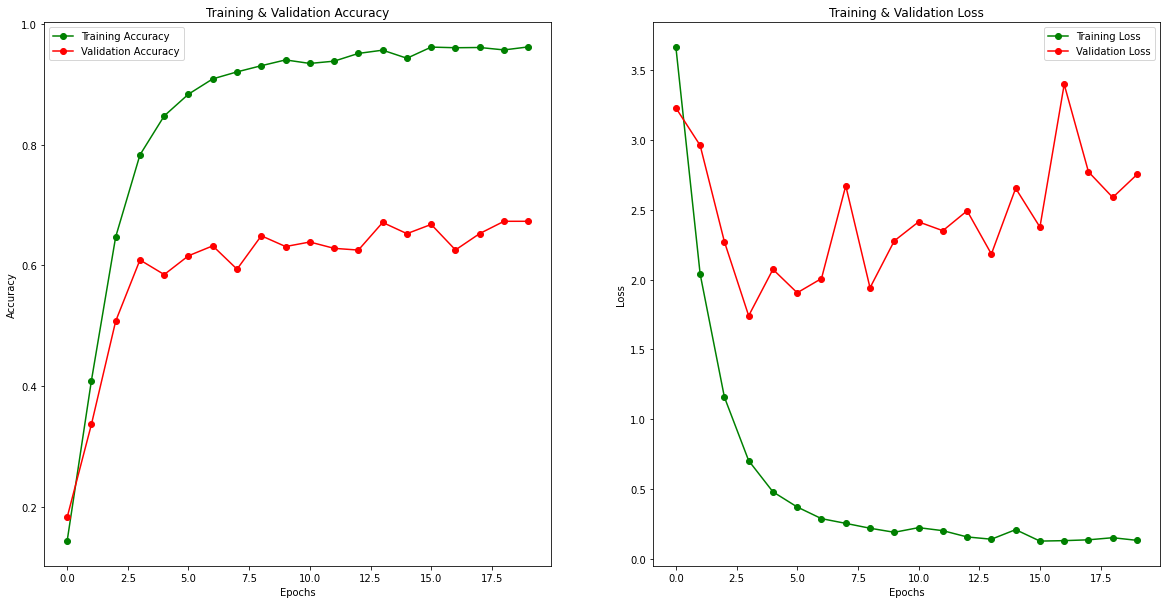

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

314/314 [==============================] - 7s 23ms/step - loss: 3.7799 - accuracy: 0.5680


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       272
           1       0.94      0.66      0.77        88
           2       0.81      0.38      0.51        56
           3       0.86      0.37      0.51       117
           4       0.70      0.43      0.53        87
           5       0.69      0.46      0.55       112
           6       0.69      0.76      0.72       112
           7       0.42      0.46      0.44       225
           8       0.76      0.45      0.57        84
           9       0.73      0.95      0.82       161
          10       0.92      0.42      0.58       166
          11       0.75      0.84      0.79       151
          12       0.42      0.94      0.58       140
          13       0.64      0.58      0.61       149
          14       0.88      0.65      0.75       146
          15       0.63      0.69      0.66       182
          16       0.57      0.23      0.32       141
          17       0.42    

## -5

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_5_minus,y_train_5_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch= X_train_5_minus.shape[0] // batch_size)

Epoch 1/20
1096/1096 - 156s - loss: 2.5507 - accuracy: 0.3319 - val_loss: 2.0778 - val_accuracy: 0.4520 - 156s/epoch - 142ms/step
Epoch 2/20
1096/1096 - 153s - loss: 0.8771 - accuracy: 0.7315 - val_loss: 2.7169 - val_accuracy: 0.4057 - 153s/epoch - 140ms/step
Epoch 3/20
1096/1096 - 151s - loss: 0.4700 - accuracy: 0.8556 - val_loss: 1.6917 - val_accuracy: 0.6393 - 151s/epoch - 138ms/step
Epoch 4/20
1096/1096 - 154s - loss: 0.3235 - accuracy: 0.9001 - val_loss: 2.0150 - val_accuracy: 0.6317 - 154s/epoch - 140ms/step
Epoch 5/20
1096/1096 - 152s - loss: 0.2587 - accuracy: 0.9202 - val_loss: 2.0344 - val_accuracy: 0.6507 - 152s/epoch - 139ms/step
Epoch 6/20
1096/1096 - 152s - loss: 0.2175 - accuracy: 0.9330 - val_loss: 2.1554 - val_accuracy: 0.6704 - 152s/epoch - 139ms/step
Epoch 7/20
1096/1096 - 153s - loss: 0.1973 - accuracy: 0.9404 - val_loss: 2.3113 - val_accuracy: 0.6545 - 153s/epoch - 139ms/step
Epoch 8/20
1096/1096 - 152s - loss: 0.1764 - accuracy: 0.9482 - val_loss: 2.6502 - val_acc

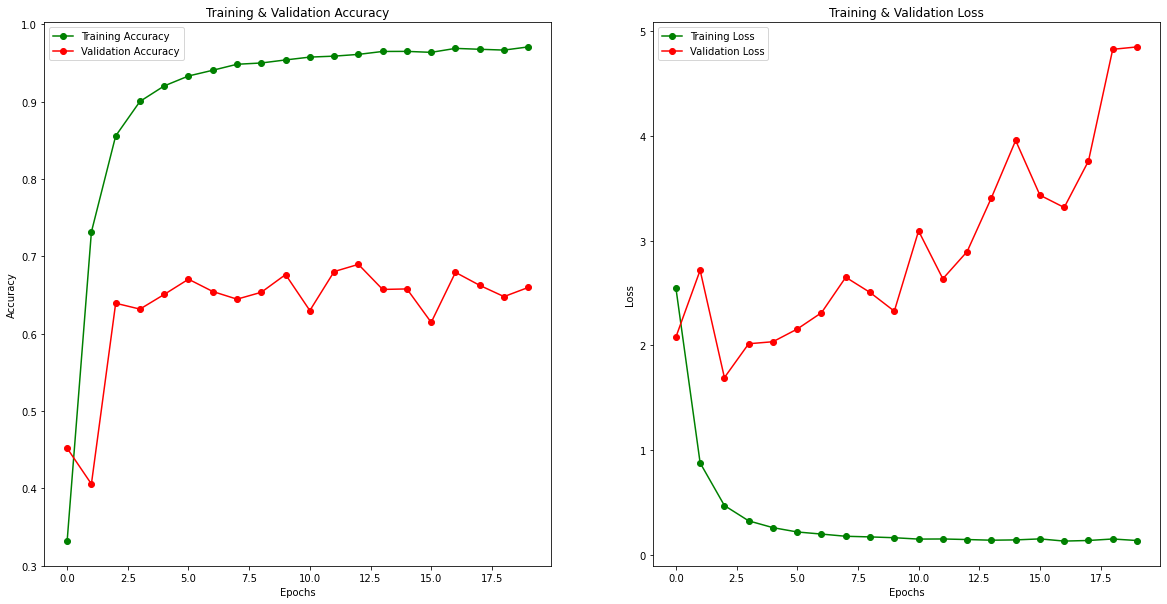

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_10_minus,y_train_10_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_10_minus.shape[0] // batch_size)

Epoch 1/20
1096/1096 - 155s - loss: 2.7664 - accuracy: 0.2966 - val_loss: 2.5954 - val_accuracy: 0.4086 - 155s/epoch - 142ms/step
Epoch 2/20
1096/1096 - 154s - loss: 0.8900 - accuracy: 0.7314 - val_loss: 2.4023 - val_accuracy: 0.4645 - 154s/epoch - 140ms/step
Epoch 3/20
1096/1096 - 151s - loss: 0.4927 - accuracy: 0.8476 - val_loss: 1.9658 - val_accuracy: 0.5817 - 151s/epoch - 138ms/step
Epoch 4/20
1096/1096 - 150s - loss: 0.3529 - accuracy: 0.8891 - val_loss: 1.9564 - val_accuracy: 0.6182 - 150s/epoch - 137ms/step
Epoch 5/20
1096/1096 - 151s - loss: 0.2805 - accuracy: 0.9148 - val_loss: 2.1213 - val_accuracy: 0.6198 - 151s/epoch - 138ms/step
Epoch 6/20
1096/1096 - 152s - loss: 0.2496 - accuracy: 0.9230 - val_loss: 2.2022 - val_accuracy: 0.6353 - 152s/epoch - 139ms/step
Epoch 7/20
1096/1096 - 154s - loss: 0.2192 - accuracy: 0.9333 - val_loss: 2.2594 - val_accuracy: 0.6442 - 154s/epoch - 140ms/step
Epoch 8/20
1096/1096 - 155s - loss: 0.2050 - accuracy: 0.9382 - val_loss: 2.3742 - val_acc

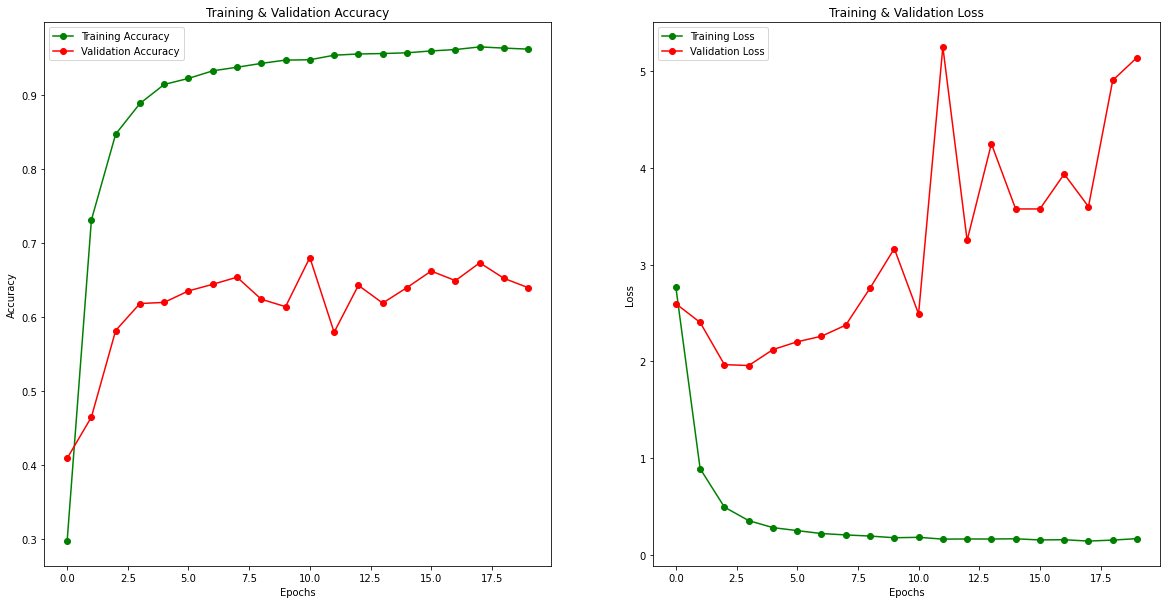

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -15

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_15_minus,y_train_15_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_15_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -20

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_20_minus,y_train_20_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_20_minus.shape[0] // batch_size)

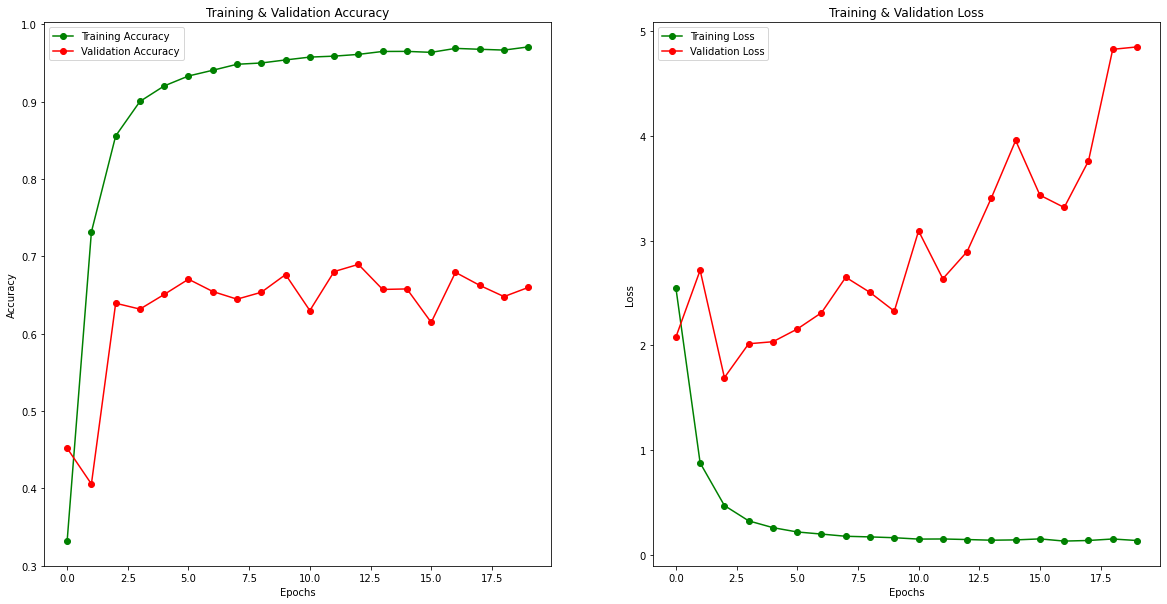

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## -30

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_30_minus,y_train_30_minus, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30_minus.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 5

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_5,y_train_5, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_5.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_10,y_train_10, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_10.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 15

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_15,y_train_15, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_15.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 20

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_20,y_train_20, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_20.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## 30

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_30,y_train_30, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train_30.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

## Random

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
hidden_unit = 32
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding="Same", activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(1024 , activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(89, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = opt , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size=64
history = model.fit(X_train_random,y_train_random, batch_size=batch_size,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_trainz.shape[0] // batch_size)

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true=np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))